## Package

In [ ]:
# Importation des packages 
import os
import numpy as np
import librosa 
import matplotlib.pyplot as plt

## Fonction Numerisation

In [ ]:
# Fonction qui numerise le signal audio 
def get_sound_data_with_sample_rate(sound):
    signal , sr = librosa.load(sound)
    return signal

In [ ]:
# Fonction pour obtenir les specters du signal
def get_spectrum(sound):
    s = read_wave(str(sound))
    return s.make_spectrum()

## Fonction Filtrage

In [202]:
from scipy.signal import butter, lfilter
sound_filter=[]
cutoff = 600
def filtrage(y):
    order = 1
    b, a = butter(order, cutoff / (22050 / 2), btype='low')
    sound = lfilter(b, a, y)
    return sound

##  Fonction Normalisation


In [7]:
def normalisation(samples):
    max_value = np.max(np.abs(samples))
    normalized_samples = samples / max_value
    return normalized_samples

##  Fonction Detection de pic 

In [91]:
seuil = 0.5
def detecte_peaks(y): 
    peaks = np.where(y > seuil)
    position = np.where(y)
    return peaks[0],position 

##  Fonction Fenetrage 

In [ ]:
def all_window(peaks,all_sound_data,all_normalised):
    window=4096
    all_segment_sound=[]
    position=all_sound_data
    try:
        depart=peaks[0]
        fin=depart+window
        segment=position[0][depart:fin]
        all_segment_sound.append(segment)
    except :
        all_segment_sound.append(0)
    for i in range(len(peaks)):
        if peaks[i]>fin:
            depart=peaks[i]
            fin=depart+window
            if fin<110248:
                segment=position[0][depart:fin]
                all_segment_sound.append(segment)   
    return all_segment_sound

##  Fonction Visualisation


In [16]:
def visualiser(all_segment,all_normalised):
    try :
        seg=np.array(all_segment)
        plt.figure(figsize=(20, 5))
        plt.plot(all_normalised)
        plt.plot(seg,all_normalised[seg],'ro')
        plt.xlabel('temps')
        plt.ylabel('Amplitude')
        plt.title(f'Signal en présence des PIC')
        plt.show()
    except :
        print(f'ERREUR SUR ')

# Traitement 

In [173]:
signal=get_sound_data_with_sample_rate('bois_396.wav') # Chargement du fichier

Text(0.5, 1.0, 'Signal avant filtrage')

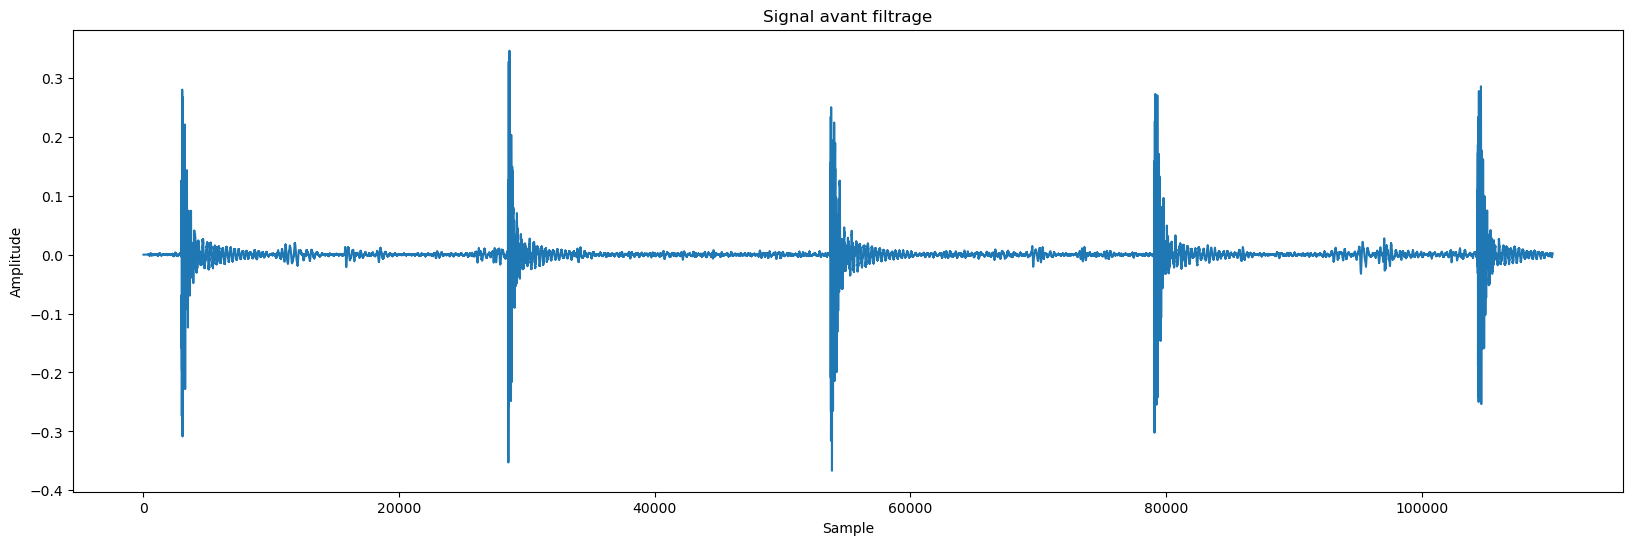

In [174]:
# FIgure du signale sans filtrage 
plt.figure(figsize=(20, 6))
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title(f'Signal avant filtrage')

In [206]:
filtred_signal=filtrage(signal) # FIltrage du signal
import sounddevice as sd 
sd.play(filtred_signal, 22050) # Ecouter le signal filtrer
sd.wait()

<sounddevice.CallbackFlags: output underflow>

Text(0.5, 1.0, 'Signal Apres filtrage')

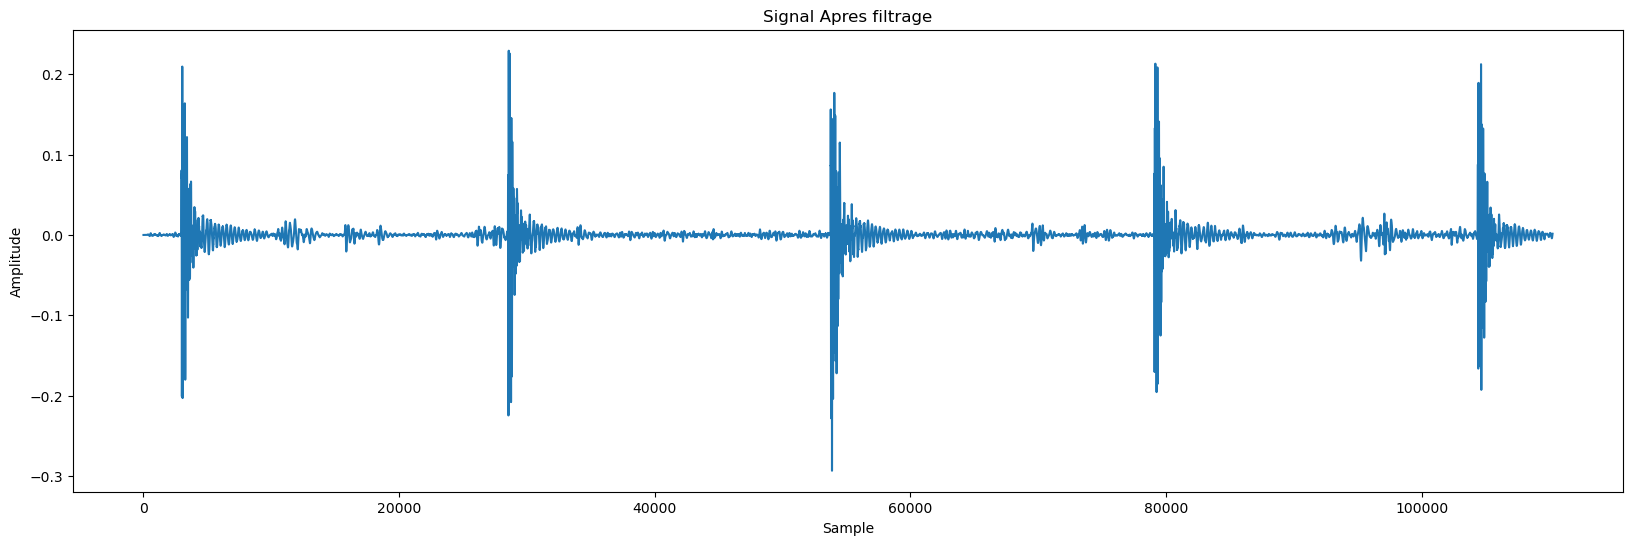

In [176]:
#Figure Apres le filtrage 
plt.figure(figsize=(20, 6))
plt.plot(filtred_signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title(f'Signal Apres filtrage')

## Zoom sur les 10.000 première echantillons du signal sans filtrage audio ''bois_396.wav''

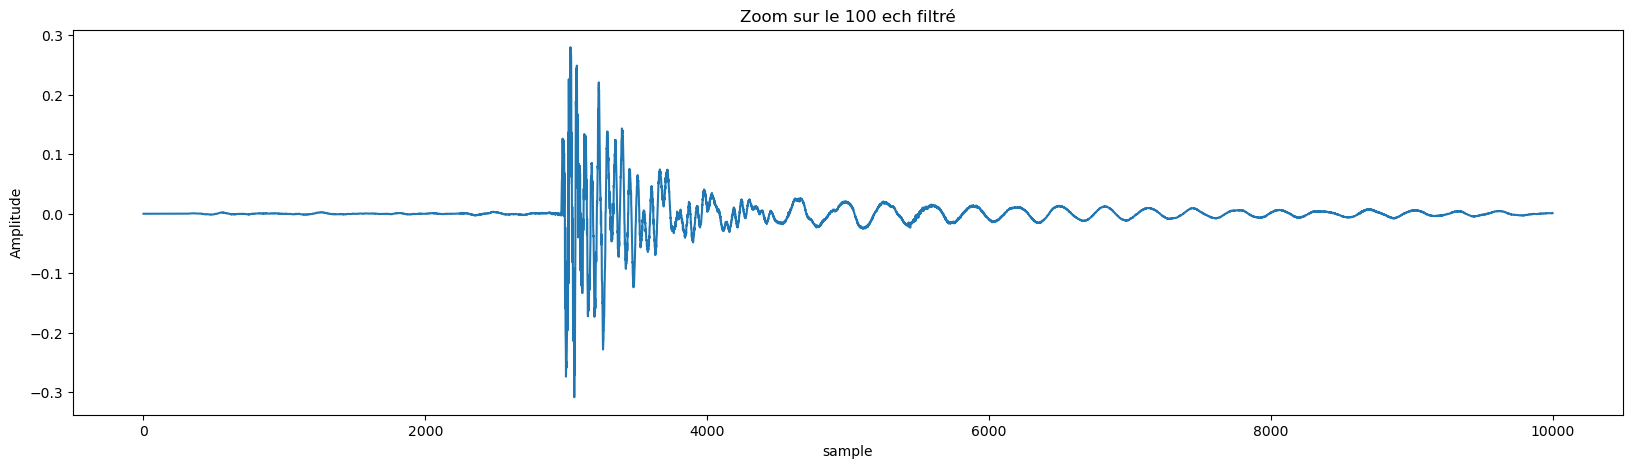

In [187]:
plt.figure(figsize=(20, 5))
plt.plot(signal[0:10000])
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Zoom sur le 100 ech filtré')
plt.show()

## Zoom sur les 10.000 première echantillons du signal APRES filtrage ''bois_396.wav''

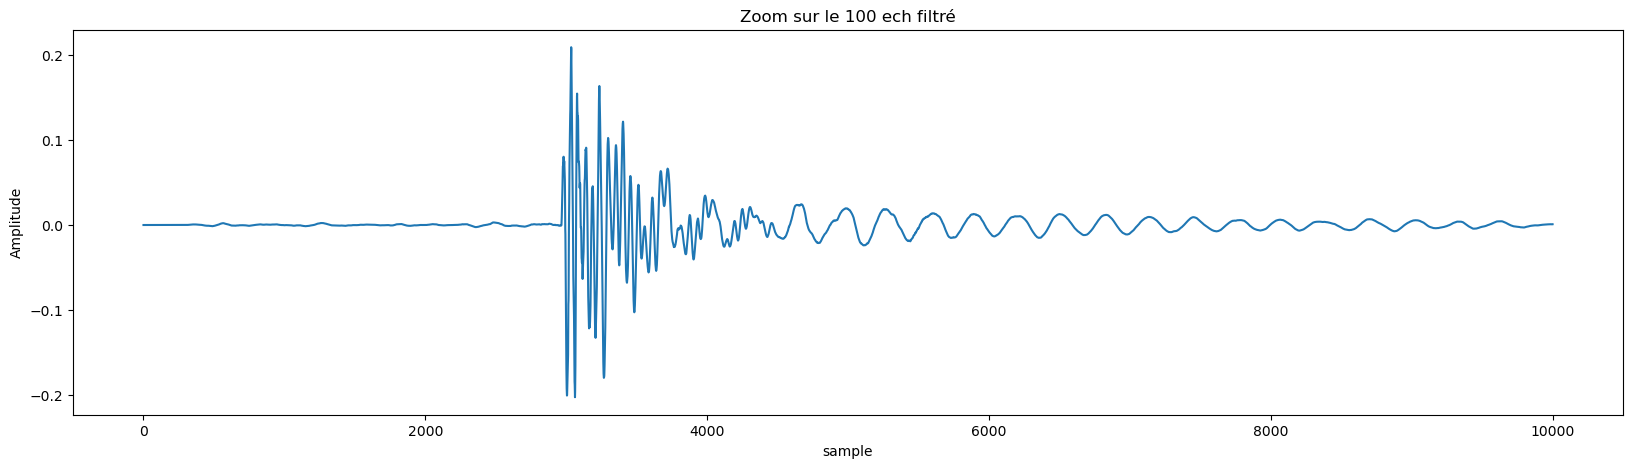

In [188]:
plt.figure(figsize=(20, 5))
plt.plot(filtred_signal[0:10000])
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Zoom sur le 100 ech filtré')
plt.show()

## Zoom sur l'audio ''bois_396.wav'' avant filtrage  

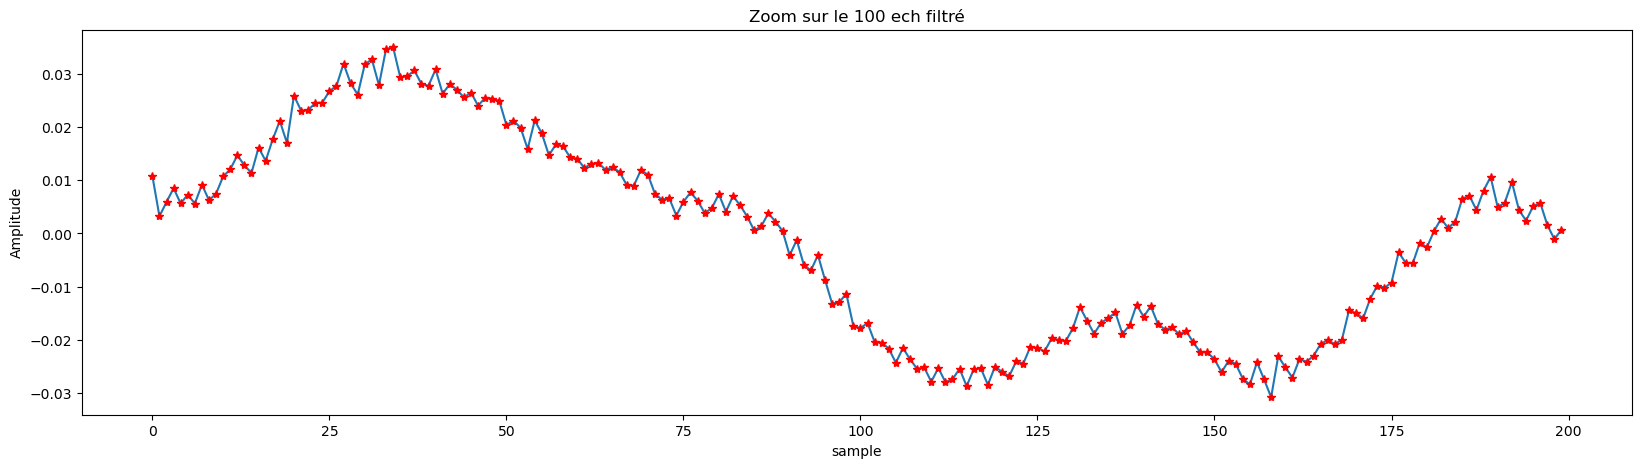

In [189]:
# Zoom sur 200 echantillon de l'audio entre 4000 à 4200 ème echantillon , Juste pour mieux visualiser le signal avant et apres 
plt.figure(figsize=(20, 5))
plt.plot(signal[4000:4200])
plt.plot(signal[4000:4200],'r*')
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Zoom sur le 100 ech filtré')
plt.show()

## Zoom sur l'audio ''bois_396.wav'' apres filtrage  

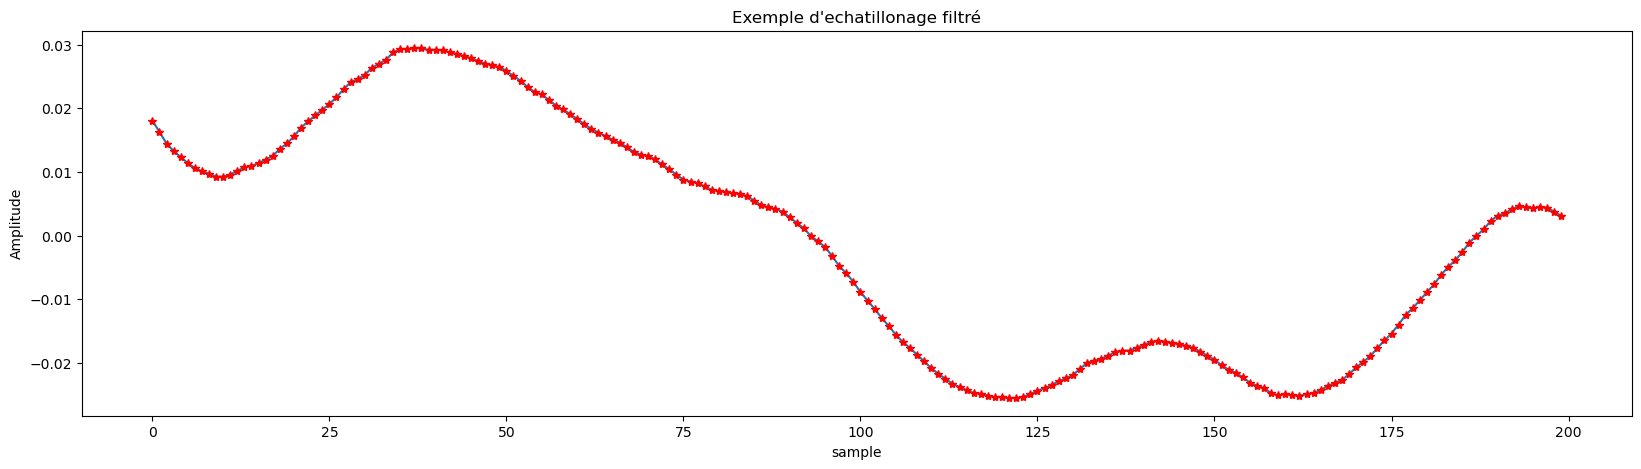

In [178]:
plt.figure(figsize=(20, 5))
plt.plot(filtred_signal[4000:4200])
plt.plot(filtred_signal[4000:4200],'r*')
plt.xlabel('sample')
plt.ylabel('Amplitude')
plt.title('Exemple d\'echatillonage filtré')
plt.show()

### Detection de pic du signal normalisé 

In [204]:
sound_normalised=normalisation(filtred_signal)

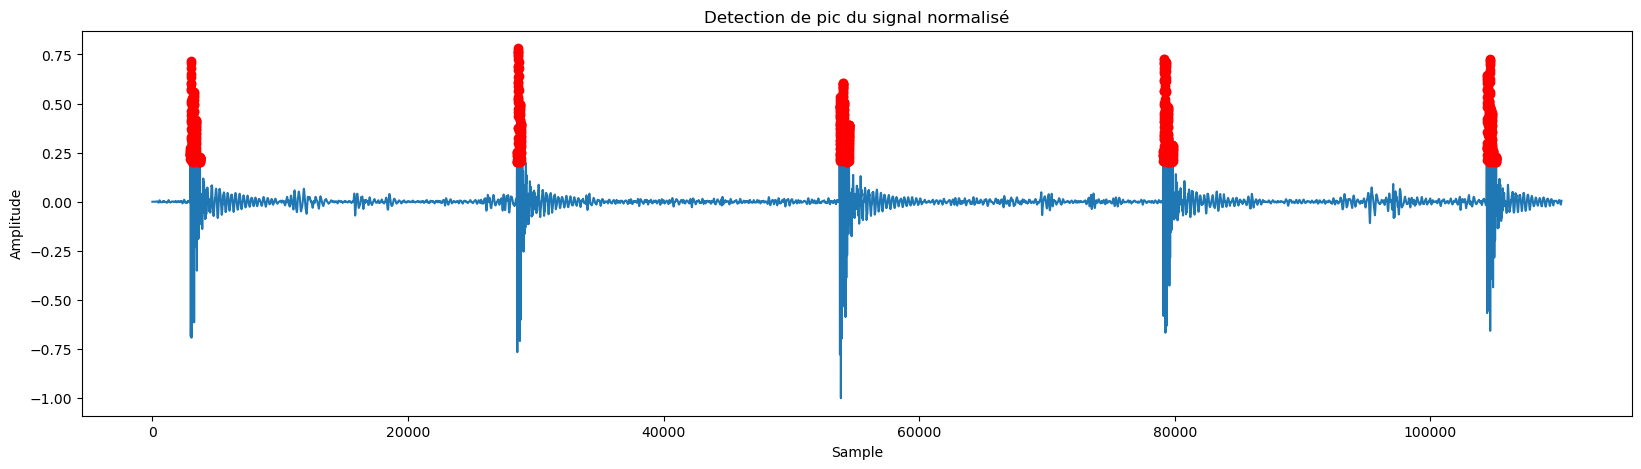

In [205]:
peaks = np.where(sound_normalised > 0.2)
plt.figure(figsize=(20, 5))
plt.plot(sound_normalised)
plt.plot(peaks[0], sound_normalised[peaks], 'ro')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Detection de pic du signal normalisé')
plt.show()


In [92]:
all_peaks,all_position=detecte_peaks(sound_normalised)

In [154]:
all_peaks

array([  3033,   3034,   3035,   3036,   3037,   3038,   3039,   3040,
         3041,  28578,  28579,  28580,  28581,  28582,  28583,  28584,
        28585,  28586,  28643,  28644,  28645,  28646,  28647,  28648,
        28649,  28650,  28651,  28652,  28653,  28654,  54043,  54044,
        54045,  54046,  54047,  54048,  54049,  54050,  54051,  54052,
        54053,  54054,  54055,  54056,  54057,  54058,  54059,  54060,
        54122,  54123,  54124,  54125,  54126,  54127,  54128,  79169,
        79170,  79171,  79172,  79173,  79174,  79175,  79176,  79177,
        79178,  79179,  79229,  79230,  79231,  79232,  79233,  79234,
        79235,  79236,  79329,  79330,  79331,  79332,  79333,  79334,
        79335,  79336,  79337, 104453, 104454, 104455, 104456, 104457,
       104487, 104488, 104489, 104490, 104649, 104650, 104651, 104652,
       104653, 104654, 104655, 104656, 104657, 104658, 104659],
      dtype=int64)

# Fenetrage apres detection de pic

In [167]:
all_segment=all_window(all_peaks,all_position,sound_normalised)

In [168]:
all_segment

[array([3255, 3256, 3257, ..., 7348, 7349, 7350], dtype=int64),
 array([28800, 28801, 28802, ..., 32893, 32894, 32895], dtype=int64),
 array([54265, 54266, 54267, ..., 58358, 58359, 58360], dtype=int64),
 array([79391, 79392, 79393, ..., 83484, 83485, 83486], dtype=int64),
 array([104675, 104676, 104677, ..., 108768, 108769, 108770], dtype=int64)]

# VIsualisation du fenetre avec le signal


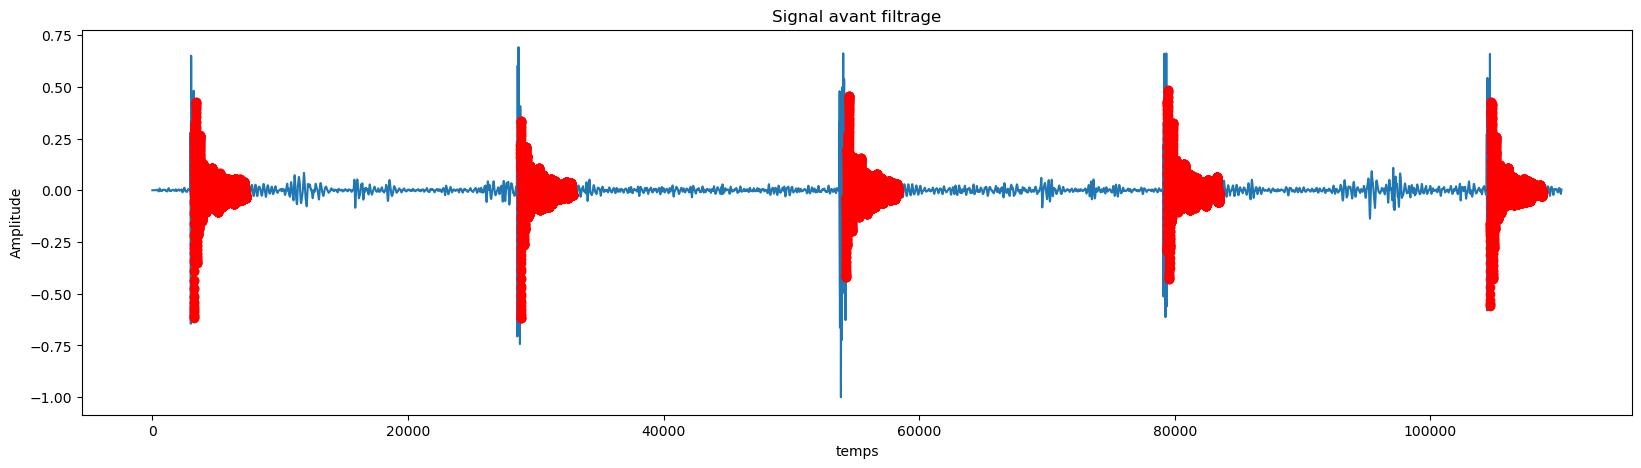

In [169]:
visualiser(all_segment,sound_normalised)